In [1]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import time


In [3]:
def fieldupdate3(T=10,size=100,E=ez,Hx=hx,Hy=hy,Eps=Eps):
    E_sum=0
    imp0=377
#     E_history=[]
#     Hx_history=[]
#     Hy_history=[]
#     test=[]
    for t in range(T):
        for i in range(size):
            for j in range(size-1):
                Hx[i][j]=Hx[i][j]+(E[i][j+1]-E[i][j])/imp0/2/Eps[i][j]

        for i in range(size-1):
            for j in range(size):
                
                Hy[i][j]=Hy[i][j]+(E[i+1][j]-E[i][j])/imp0/2
                
                
        for i in range(size-1):
            for j in range(size-1):
                E[i+1][j+1]=E[i+1][j+1]+(Hx[i+1][j+1]+Hy[i+1][j+1]-Hx[i+1][j]-Hy[i][j+1])*imp0/2
        #E[int(size/4)][int(size/4)]+=math.sin(0.1*t)
        E[int(size/2)][int(size/2)]+=math.sin(0.1*t)
        #E[int(size/2)][int(size/2)+1]+=math.sin(0.1*t)
        #E[int(size/2)][int(size/2)]+=math.exp(-(t+1-0.3*size)*(t+1-0.3*size)/100)
        E_sum+= E[int(size/4)][int(size/4)]
#         test.append(E[int(0.5*size)])
#         E_history.append(E.copy())
#         Hx_history.append(Hx.copy())
#         Hy_history.append(Hy.copy())
#     with open("E field history.txt", 'w') as f:
#         for member in E_history:
#             f.write(str(member) + '\n')
#     with open("Hx field history.txt", 'w') as f:
#         for member in Hx_history:
#             f.write(str(member) + '\n')
#     with open("Hy field history.txt", 'w') as f:
#         for member in Hy_history:
#             f.write(str(member) + '\n')
#     E_history=np.array(E_history)
        
    return E,E_sum

In [5]:
#M=torch.tensor([[1., 1., 1.],
#        [1., 1., 1.],
#        [1., 1., 1.]], dtype=torch.float64,requires_grad=True)
M=torch.zeros((3,3), dtype=torch.float64,requires_grad=True)
#M=torch.tensor(M,requires_grad=True)
print(M)
target=torch.tensor([3.,6.,9.],dtype=torch.float64)
#target=target.unsqueeze(1)
X=torch.tensor([1.,1.,1.], dtype=torch.float64,requires_grad=True)
print(target.size())
pred=torch.matmul(M,X)
pred=pred.reshape([3,])
print(pred.size())
print(target-pred)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64, requires_grad=True)
torch.Size([3])
torch.Size([3])
tensor([3., 6., 9.], dtype=torch.float64, grad_fn=<SubBackward0>)


In [8]:
criterion=nn.MSELoss()
import torch.optim as optim
optimizer = torch.optim.Adam([M], lr=0.01, betas=(0.9, 0.999), eps=1e-07, weight_decay=0.01)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = torch.matmul(M,X)
    print(output)
    print(target)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    print(loss)
    #print(X)
    #print(M)


tensor([2.9851, 5.9702, 8.6729], dtype=torch.float64, grad_fn=<MvBackward>)
tensor([3., 6., 9.], dtype=torch.float64)
tensor(0.0360, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor([3.0018, 5.9403, 8.7029], dtype=torch.float64, grad_fn=<MvBackward>)
tensor([3., 6., 9.], dtype=torch.float64)
tensor(0.0306, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor([2.9794, 5.9626, 8.7328], dtype=torch.float64, grad_fn=<MvBackward>)
tensor([3., 6., 9.], dtype=torch.float64)
tensor(0.0244, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor([2.9692, 5.9840, 8.7624], dtype=torch.float64, grad_fn=<MvBackward>)
tensor([3., 6., 9.], dtype=torch.float64)
tensor(0.0192, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor([2.9747, 5.9928, 8.7916], dtype=torch.float64, grad_fn=<MvBackward>)
tensor([3., 6., 9.], dtype=torch.float64)
tensor(0.0147, dtype=torch.float64, grad_fn=<MseLossBackward>)
tensor([2.9855, 5.9899, 8.8203], dtype=torch.float64, grad_fn=<MvBackward>)
tensor([3., 6., 9.]

In [44]:
print(M)
print(X)
print(torch.matmul(M,X))

tensor([[0.9950, 0.9950, 0.9950],
        [1.9900, 1.9900, 1.9900],
        [2.9851, 2.9851, 2.9851]], dtype=torch.float64, requires_grad=True)
tensor([1., 1., 1.], dtype=torch.float64, requires_grad=True)
tensor([2.9851, 5.9701, 8.9552], dtype=torch.float64, grad_fn=<MvBackward>)


In [59]:
size=10
ez=torch.zeros((size,size))
hx=torch.zeros((size,size))
hy=torch.zeros((size,size))
Eps=torch.ones((size,size),requires_grad=True)
target=torch.tensor([[0.1]])

In [46]:
start_time = time.time()


E,E_sum=fieldupdate3(10,size,ez,hx,hy,Eps)
print("--- %s seconds ---" % (time.time() - start_time))


--- 23.354227781295776 seconds ---


In [60]:
import torch.optim as optim
optimizer = torch.optim.Adam([Eps], lr=0.1, betas=(0.9, 0.999), eps=1e-07, weight_decay=0.01)  #adam optimizer
    
for i in range(5):
    optimizer.zero_grad()   # zero the gradient buffers
    ez=torch.zeros((size,size))
    hx=torch.zeros((size,size))
    hy=torch.zeros((size,size))
    E,E_sum=fieldupdate3(10,size,ez,hx,hy,Eps)
    output = E_sum
    print(output)
    print(target)
    #torch.autograd.set_detect_anomaly(True)
    loss = criterion(output, target)
    loss.backward(retain_graph=True)
    optimizer.step()
    print(loss)
    #print(X)
    #print(M)


tensor(0.0193, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0065, grad_fn=<MseLossBackward>)
tensor(0.0241, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0058, grad_fn=<MseLossBackward>)
tensor(0.0303, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0049, grad_fn=<MseLossBackward>)
tensor(0.0381, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0038, grad_fn=<MseLossBackward>)
tensor(0.0472, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0028, grad_fn=<MseLossBackward>)


In [63]:
import torch.optim as optim
optimizer = torch.optim.Adam([Eps], lr=0.1, betas=(0.9, 0.999), eps=1e-07, weight_decay=0.01)  #adam optimizer
    
for i in range(5):
    optimizer.zero_grad()   # zero the gradient buffers
    ez=torch.zeros((size,size))
    hx=torch.zeros((size,size))
    hy=torch.zeros((size,size))
    E,E_sum=fieldupdate3(10,size,ez,hx,hy,Eps)
    output = E_sum
    print(output)
    print(target)
    #torch.autograd.set_detect_anomaly(True)
    loss = criterion(E[4][4], target)
    loss.backward(retain_graph=True)
    optimizer.step()
    print(loss)
    #print(X)
    #print(M)


tensor(0.0557, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0009, grad_fn=<MseLossBackward>)
tensor(0.0580, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0010, grad_fn=<MseLossBackward>)
tensor(0.0792, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0014, grad_fn=<MseLossBackward>)
tensor(0.1492, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0003, grad_fn=<MseLossBackward>)
tensor(2.2799, grad_fn=<AddBackward0>)
tensor([[0.1000]])
tensor(0.0006, grad_fn=<MseLossBackward>)


In [64]:
print(E[4][4])
print(E_sum)

tensor(0.1237, grad_fn=<SelectBackward>)
tensor(2.2799, grad_fn=<AddBackward0>)


In [65]:
print(Eps)

tensor([[0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349,
         0.0349],
        [0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349,
         0.0349],
        [0.0349, 0.0373, 0.0311, 0.0637, 0.1012, 0.0607, 0.0349, 0.0349, 0.0349,
         0.0349],
        [0.0349, 0.0360, 0.1651, 0.2871, 0.3122, 0.2626, 0.1622, 0.0349, 0.0349,
         0.0349],
        [0.0349, 0.3020, 0.3859, 0.4341, 0.4356, 0.4189, 0.3656, 0.2405, 0.0349,
         0.0349],
        [0.0349, 0.2510, 0.3738, 0.4199, 0.4346, 0.4358, 0.3787, 0.2911, 0.0349,
         0.0349],
        [0.0349, 0.0349, 0.1617, 0.2645, 0.3102, 0.2807, 0.1656, 0.0349, 0.0349,
         0.0349],
        [0.0349, 0.0349, 0.0349, 0.0606, 0.1008, 0.0638, 0.0349, 0.0349, 0.0349,
         0.0349],
        [0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349,
         0.0349],
        [0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349, 0.0349,
         0.0349]], requires_

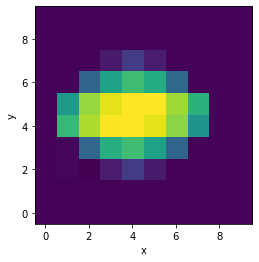

In [66]:
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(Eps.detach().numpy(),origin='lower')

limit value of Eps matrix
expand size
get fdtd package work
tune hyper parameter